Bivariate Linear Regression
Mean Squared Error: 9.466330862652141e-31
R^2 Score: 1.0



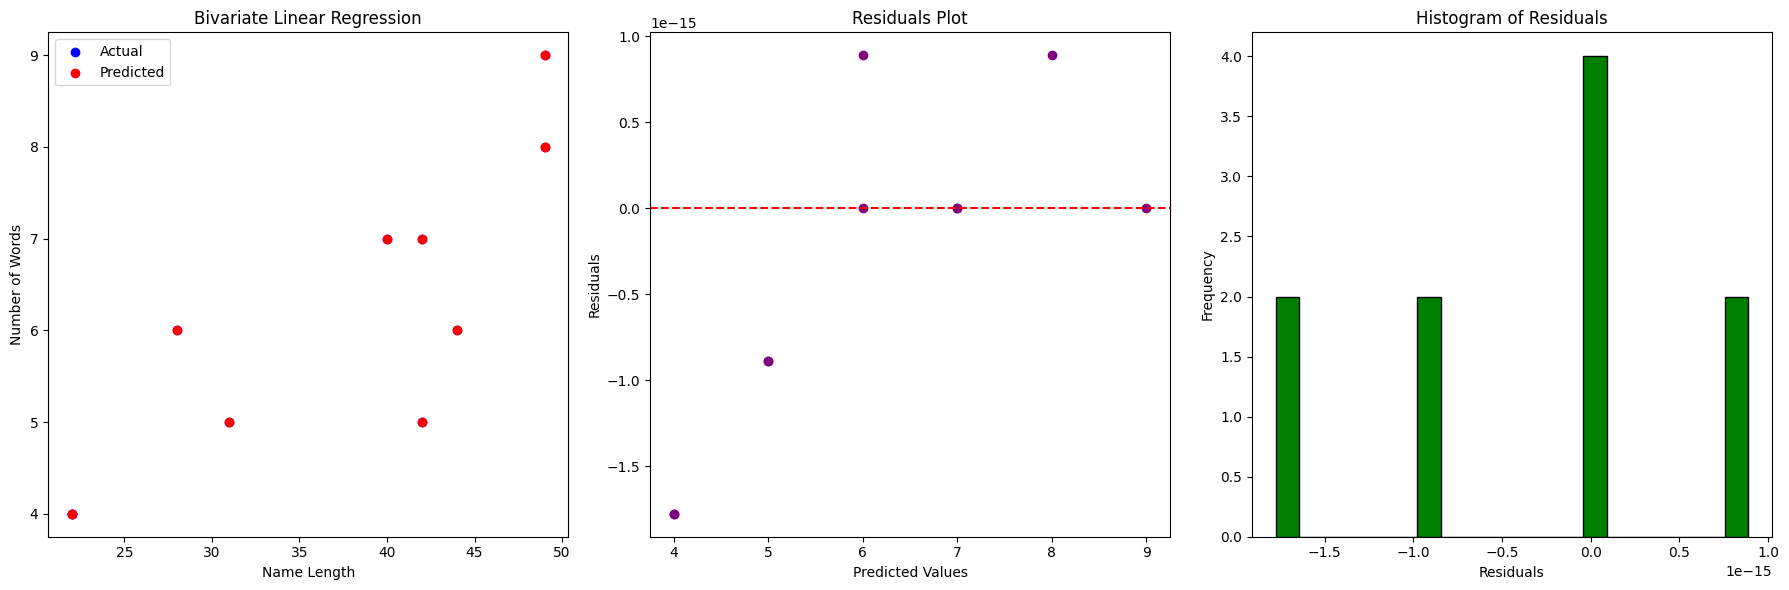

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('./STTs.csv')

# Hypothetical target: Predicting the number of words in a sentence
data['num_words'] = data['name'].apply(lambda x: len(x.split()))

# Bivariate features: Length of the name and number of words
data['name_length'] = data['name'].apply(len)

X_bi = data[['name_length', 'num_words']]
y = data['num_words']
X_train_bi, X_test_bi, y_train_bi, y_test_bi = train_test_split(X_bi, y, test_size=0.2, random_state=42)
model_bi = LinearRegression()
model_bi.fit(X_train_bi, y_train_bi)
y_pred_bi = model_bi.predict(X_test_bi)

print("Bivariate Linear Regression")
print("Mean Squared Error:", mean_squared_error(y_test_bi, y_pred_bi))
print("R^2 Score:", r2_score(y_test_bi, y_pred_bi))
print()

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.scatter(X_test_bi['name_length'], y_test_bi, color='blue', label='Actual')
plt.scatter(X_test_bi['name_length'], y_pred_bi, color='red', label='Predicted')
plt.xlabel('Name Length')
plt.ylabel('Number of Words')
plt.title('Bivariate Linear Regression')
plt.legend()

plt.subplot(1, 3, 2)
residuals_bi = y_test_bi - y_pred_bi
plt.scatter(y_pred_bi, residuals_bi, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')

plt.subplot(1, 3, 3)
plt.hist(residuals_bi, bins=20, color='green', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')

plt.tight_layout()
plt.show()
